**Classificação - Mineração de Dados**


**Nome: Davi Augusto Neves Leite**

**Data de Entrega: 17/10/2023**


---


# **Materiais**


Os principais recursos para a execução desta atividade podem ser vistos a seguir.

1. **Software**

- Sistemas Operacionais: Windows 11 para _desktop_;
- Ambiente de Desenvolvimento Integrado: Microsoft Visual Studio Code;
- Linguagem de Programação: Python 3.12.0 64-bit.

2. **Hardware**

- Notebook pessoal Lenovo Ideapad 330-15IKB com: processador Intel Core i7-8550U, HDD WD Blue WD10SPZX de 1TB, SSD Crucial BX500 de 1TB, 12 GB DDR4 de Memória RAM e placa de vídeo NVIDIA GeForce MX150 (2 GB GDDR5 de memória).


---


# **Instalação das Bibliotecas Principais**

Nota: ao decorrer deste Notebook, outras bibliotecas podem ser utilizadas em quaisquer respectiva seção/conjunto de dados, dependendo da necessidade. Abaixo, há a instalação das principais que são comuns e utilizadas em todas ou quase todas seções/conjunto de dados.


In [2]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip install scikit-learn



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


---


# **Importação das Bibliotecas Principais**

Nota: ao decorrer deste Notebook, outras bibliotecas podem ser utilizadas em quaisquer respectiva seção/conjunto de dados, dependendo da necessidade. Abaixo, há a importação das principais que são comuns e utilizadas em todas ou quase todas seções/conjunto de dados.


In [3]:
import numpy as np  # Manipulação de listas
import pandas as pd  # Manipulação de tabelas
import seaborn as sbn  # Geração de gráficos estatísticos
import plotly.express as px  # Outro para geração de gráficos
import matplotlib.pyplot as plt  # Geração de gráficos de listas
import sklearn as skl  # Biblioteca para pré-processamento
from copy import copy as cp  # Possibilitar copiar os objetos

# Ignorar os avisos não importantes durante a execução deste notebook
import warnings

warnings.filterwarnings("ignore")

---


# **Conjunto de Dados: _Fashion MNIST_**


**Descrição do Dataset:** este conjunto é composto por **70 mil imagens** a respeito de **10 peças de roupas distintas**. Cada imagem possui a **resolução de 28x28 (784 pixels) em escala de cinza e 256 níveis de cinza**. Desse total, exitem **7000 imagens** para cada uma das peças de roupas, ou classes.

Cada classe pode ser vista a seguir.

1. Camiseta
2. Calça
3. Pulôver
4. Vestido
5. Casaco
6. Sandália
7. Camisa
8. Tênis
9. Bolsa
10. Bota de Tornozelo

Este conjunto de dados pode ser acessado por meio de: [Fashion MNIST](https://www.openml.org/search?type=data&status=active&id=40996)
(última data de acesso: 02 de out. de 2023).


**Para fins práticos, apenas as classes _Camiseta_, _Vestido_, _Casaco_ e _Camisa_ serão utilizadas para esta atividade, tendo em vista que, por se tratar de uma base de dados de imagens, o processamento necessário para classificação é elevado.**


## **Importação da Base de Dados**


Para importar as imagens, utiliza-se o módulo **scikit-learn** capaz de carregar diversas bases de dados através do portal **OpenML**, o qual essa base de dados está disponível online.


In [4]:
# Importação da função necessária para importação de base de dados OpenML
from sklearn.datasets import fetch_openml

# Carrega as imagens e suas classes separadamente
images, targets = fetch_openml(
    "Fashion-MNIST", return_X_y=True, as_frame=True, parser="auto"
)

# Conversão das imagens para NumPy
images = images.to_numpy()
targets = targets.to_numpy().astype(int)

## **Pré-Processamento dos Dados**


### Separação das Classes de Interesse

Inicia-se com a separação das classes de interesse, isto é: _Camiseta_, _Vestido_, _Casaco_ e _Camisa_. Cada qual será referida, respectivamente, pela identificação de 0 a 3 (_0 - Camiseta_, _1 - Vestido_, ...).


In [5]:
# Definição das classes de interesse
labels_class = {0: 0, 3: 1, 4: 2, 6: 3}

# Variáveis de seleção das imagens e classes respectivas
selected_images = []
selected_targets = []

# Criação de um dicionário com os rótulos das classes para fácil acesso
labels_desc = {0: "camiseta", 1: "vestido", 2: "casaco", 3: "camisa"}
labels_names = ["Camiseta", "Vestido", "Casaco", "Camisa"]

# Percorre as imagens da base de dados original
for idx, label in enumerate(targets):
    # Para cada rótulo de interesse, salvar as imagens e os rótulos
    if label in labels_class.keys():
        selected_images.append(images[idx])
        selected_targets.append(labels_class[targets[idx]])

# Conversão para NumPy
selected_images = np.array(selected_images)
selected_targets = np.array(selected_targets)

print("Imagens Selecionadas:\n", selected_images)
print("\nRótulos Selecionados: ", selected_targets)
print("\nTotal de Dados: ", selected_images.shape[0])
print("\nCaracterísticas Totais: ", selected_images.shape[1])

Imagens Selecionadas:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Rótulos Selecionados:  [0 0 1 ... 1 2 3]

Total de Dados:  28000

Características Totais:  784


### Exibição das Classes de Interesse

Abaixo, é possível visualizar uma amostra de cada classe, por meio do **matplotlib**.


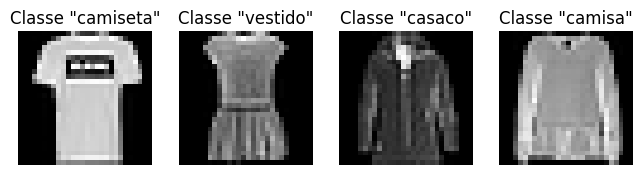

In [6]:
# Selecionando um índice de cada classe
idx_0 = np.where(selected_targets == 0)[0][0]
idx_1 = np.where(selected_targets == 1)[0][0]
idx_2 = np.where(selected_targets == 2)[0][0]
idx_3 = np.where(selected_targets == 3)[0][0]
idx_example_images = np.array([idx_0, idx_1, idx_2, idx_3])

# Definindo o tamanho da figura
plt.figure(figsize=(10, 8))

# Definindo o número de linhas e colunas das subfiguras
fig_n_rows = 1
fig_n_cols = 5

# Mostrando as amostras de cada classe
for label, image_idx in enumerate(labels_desc.keys()):
    plt.subplot(fig_n_rows, fig_n_cols, label + 1)
    plt.title(f'Classe "{labels_desc[label]}"')
    plt.imshow(
        selected_images[idx_example_images[image_idx]].reshape(28, 28), cmap="gray"
    )
    plt.axis("off")
plt.show()

### Tratamento de Dados Perdidos ou Inexistentes (NaN)


Para verificar se algum dado está faltando, **caso não seja indicado pela descrição do _dataset_**, pode ser realizado a seguinte operação de força-bruta:


In [7]:
# Verificando o número de dados faltantes a partir do NumPy
missing_selected_image = np.isnan(selected_images)
missing_selected_image = np.sum(missing_selected_image)
print("Número de Dados Perdidos: {0}".format(missing_selected_image))

Número de Dados Perdidos: 0


Como é possível ver, não há nenhum dado perdido neste _dataset_ e, desta forma, não é necessário realizar nenhum método de tratamento neste contexto.


### Normalização dos Dados


Para normalizar os dados via _Standardization (Z-Score)_ deste **dataset**, basta aplicar as seguintes operações:


In [8]:
# Função responsável pela normalização via Z-Score
from sklearn.preprocessing import StandardScaler

# Mostrando os dados não normalizados
print("Dados Não Normalizados")
print(
    "\tMédia: {0} | Desvio-Padrão: {1}".format(
        np.mean(selected_images), np.std(selected_images)
    )
)
print(selected_images)


# Aplicando a Normalização com Z-Score
selected_images = StandardScaler().fit_transform(selected_images)
print("\n")

# Mostrando os dados normalizados
print("Dados Normalizados com Z-Score")
print(
    "\tMédia: {0} | Desvio-Padrão: {1}".format(
        np.mean(selected_images), np.std(selected_images)
    )
)
print(selected_images)

Dados Não Normalizados


	Média: 83.07479518950437 | Desvio-Padrão: 91.37124072201556
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Dados Normalizados com Z-Score
	Média: -1.0875654118777043e-18 | Desvio-Padrão: 1.0000000000000036
[[-0.01225947 -0.03279824 -0.04745495 ... -0.12940089 -0.06094292
  -0.02434329]
 [-0.01225947 -0.03279824 -0.04745495 ... -0.12940089 -0.06094292
  -0.02434329]
 [-0.01225947 -0.03279824 -0.04745495 ... -0.12940089 -0.06094292
  -0.02434329]
 ...
 [-0.01225947 -0.03279824 -0.04745495 ... -0.12940089 -0.06094292
  -0.02434329]
 [-0.01225947 -0.03279824 -0.04745495 ... -0.12940089 -0.06094292
  -0.02434329]
 [-0.01225947 -0.03279824 -0.04745495 ... -0.12940089 -0.06094292
  -0.02434329]]


### Redução de Dimensionalidade: _Principal Component Analysis_


Para reduzir a dimensionalidade deste **dataset**, é recomendado o uso do _Principal Component Analysis_ (PCA). Desta forma:


In [9]:
# Importação da função do PCA do sklearn
from sklearn.decomposition import PCA

# Definindo o número de componentes do PCA
n_components = 0.9

# Aplicando o PCA
pca = PCA(n_components=n_components, copy=True, whiten=False)
projected_data = pca.fit_transform(selected_images)

# Mostrando os dados projetados com PCA
print("Dados Projetados com PCA")
print(projected_data)
print("\n")

# Segundo: mostrando a matriz de covariância do PCA
print("Variâncias")
print(pca.explained_variance_ratio_)
print("\n")

# Transformando o conjunto de dados em DataFrame para melhor manipulação
column_name = ["pixel" + str(i) for i in range(1, 785)]
selected_images_zscore_frame = pd.DataFrame(selected_images, columns=column_name)

# Terceiro: mostrando os componentes do PCA
component_names = ["component {}".format(i) for i in range(len(pca.components_))]
components_pca = pd.DataFrame(
    data=pca.components_,
    index=component_names,
    columns=selected_images_zscore_frame.columns,
)
components_pca.head()

Dados Projetados com PCA
[[ -8.89243418  -6.84724742  15.63560089 ...  -2.11852133   2.83039688
    0.37564532]
 [ 20.76255007  -1.53247385  -1.77803514 ...  -0.44560986  -0.08820932
   -0.33793707]
 [ 11.63199366  -2.03290061   1.93129275 ...  -0.0802204   -0.37779828
    0.62663025]
 ...
 [  7.47857547 -11.07765904  -2.64888865 ...   0.49601293  -0.43328719
    0.09147496]
 [  7.77211044   9.59472453  -5.11239766 ...  -2.58851855   1.46644292
    0.73920643]
 [  6.28389114   7.2214502    1.51422515 ...  -2.76031065   0.56798434
   -0.38808828]]


Variâncias
[0.24181924 0.1245917  0.07211684 0.04718346 0.03065534 0.02261994
 0.02046765 0.01848201 0.01479091 0.01314452 0.01220269 0.01094536
 0.01009212 0.00901519 0.00857669 0.00782518 0.00744489 0.00717616
 0.00674517 0.00647135 0.00608507 0.00573545 0.00570089 0.00514537
 0.00505738 0.00502761 0.00480964 0.00454625 0.00446634 0.00408037
 0.00399888 0.00384314 0.00370925 0.00357938 0.00351809 0.00341067
 0.00333838 0.00327824 0.0030864

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
component 0,0.000253,-0.000658,-0.000285,0.000005,0.000088,-0.000608,-0.000290,-0.001027,-0.002466,-0.002170,...,-0.011809,-0.012032,-0.010589,-0.013604,-0.017733,-0.019641,-0.014836,-0.007411,-0.002813,-0.000871
component 1,0.000851,0.002712,0.003873,0.004866,0.006175,0.006398,0.005370,0.003025,-0.000008,-0.010876,...,-0.042242,-0.029479,-0.015880,0.022523,0.049760,0.053829,0.045636,0.026002,0.014940,0.007351
component 2,0.002872,0.010437,0.015194,0.017825,0.021191,0.023502,0.025478,0.031763,0.040093,0.042341,...,0.048384,0.059250,0.062512,0.003311,-0.040275,-0.036109,-0.013168,0.013229,0.017077,0.013500
component 3,0.004161,0.006274,0.007402,0.004852,0.008273,0.009385,0.004229,-0.001991,-0.008106,-0.011663,...,-0.019332,-0.031514,-0.039022,-0.036877,-0.024899,-0.004030,0.022753,0.047529,0.046765,0.031792
component 4,0.009946,0.017307,0.023796,0.038353,0.039208,0.032954,0.027186,0.017773,0.003482,-0.014989,...,-0.029017,-0.027419,-0.014029,0.040964,0.023774,-0.015748,-0.044488,-0.040201,-0.012357,0.008456


É possível, por exemplo, visualizar a variação do PCA na medida em que se aumentam as características (ou dimensões). A chamada **variância explicada** exprime exatamente a ideia de quanta variabilidade é possível capturar do conjunto de dados, sendo possível, a partir desta análise, levar a um melhor desempenho de treinamento do modelo.


In [10]:
import plotly.graph_objects as px_go

# Gráfico da variância do PCA, a partir dos componentes
# exp_var_cum = np.cumsum(pca.explained_variance_ratio_)
exp_var_cum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3) * 100)

fig_pca = px_go.Figure(
    data=px_go.Scatter(x=list(range(1, len(exp_var_cum) + 1)), y=exp_var_cum)
)
fig_pca.update_layout(
    title="Variância Explicada do PCA",
    xaxis_title="# de Características",
    yaxis_title="% Variância Explicada",
)

---


## **Classificação**


Uma das características dos _datasets MNIST_ é de terem pixels bem diferenciados entre si e, portanto, é possível aplicar os classificadores sem a necessidade de uma extração prévia de características, como por meio das técnicas de extração de texturas como os **Descritores de Haralick** ou do **_Local Binary Pattern_**.

Para treinar o modelo e validar os dados, será utilizado a técnica de **_cross-validation_**. Nesta técnica, os dados são separados entre um conjunto de treinamento e um de teste. O de treinamento, como o nome sugere, serve para o classificador realizar predições e "aprender" as diferentes classes. Já o de teste é utilizado para verificar o quanto o classificador "pode aprender" com o treinamento, ou seja, são feitas predições das classes neste conjunto.

Para isso, é realizado a separação de 80% do conjunto total para treinamento e 20% para conjunto de teste.


In [11]:
# Função para separação dos conjuntos
from sklearn.model_selection import train_test_split

# Divisão dos conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    selected_images, selected_targets, test_size=0.2, random_state=42
)

print("Conjunto de Treinamento\n", X_train)
print("Rótulos de Treinamento\n", y_train)
print("Quantidade de Dados de Treinamento: ", X_train.shape[0])
print()
print("Conjunto de Teste\n", X_test)
print("Rótulos de Teste\n", y_test)
print("Quantidade de Dados de Teste: ", X_test.shape[0])

Conjunto de Treinamento
 [[-0.01225947 -0.03279824 -0.04745495 ... -0.12940089 -0.06094292
  -0.02434329]
 [-0.01225947 -0.03279824 -0.04745495 ... -0.12940089 -0.06094292
  -0.02434329]
 [-0.01225947 -0.03279824 -0.04745495 ... -0.12940089 -0.06094292
  -0.02434329]
 ...
 [-0.01225947 -0.03279824 -0.04745495 ... -0.04889194 -0.06094292
  -0.02434329]
 [-0.01225947 -0.03279824 -0.04745495 ... -0.12940089 -0.06094292
  -0.02434329]
 [-0.01225947 -0.03279824 -0.04745495 ... -0.12940089 -0.06094292
  -0.02434329]]
Rótulos de Treinamento
 [0 1 3 ... 3 3 2]
Quantidade de Dados de Treinamento:  22400

Conjunto de Teste
 [[-0.01225947 -0.03279824 -0.04745495 ... -0.12940089 -0.06094292
  -0.02434329]
 [-0.01225947 -0.03279824 -0.04745495 ... -0.12940089 -0.06094292
  -0.02434329]
 [-0.01225947 -0.03279824 -0.04745495 ...  0.51467075 -0.06094292
  -0.02434329]
 ...
 [-0.01225947 -0.03279824 -0.04745495 ... -0.12940089 -0.06094292
  -0.02434329]
 [-0.01225947 -0.03279824 -0.04745495 ... -0.1294

### _Decision Trees_


As Árvores de Decisão são modelos de aprendizado de máquina supervisionado que representam decisões e suas consequências diretas, em forma de árvore. Neste modelo, cada nó interno representa um teste em um atributo, cada ramo representa um resultado do teste e cada nó folha representa uma classe. Por conta disso, as Árvores de Decisão são altamente interpretáveis, capazes de lidar com dados categóricos e numéricos, ainda que possam ser propensas ao _overfitting_ se não ajustadas corretamente.

Desta forma, para aplicar a Árvore de Decisão para o _dataset_ proposto basta realizar as seguintes etapas a seguir.


In [11]:
# Métricas para análise de desempenho
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
)

# Decision Tree para Classificação
from sklearn.tree import DecisionTreeClassifier

# Definindo hiperparâmetros
max_depth = 100

# Criando a estrutura básica
dec_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

# Realizando o treinamento
dec_tree.fit(X=X_train, y=y_train)

# Realizando a predição no conjunto de teste
y_pred = dec_tree.predict(X=X_test)

# Mostrando a acurácia obtida
dec_tree_accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {dec_tree_accuracy:.2f}")

Acurácia: 0.76


Como é possível visualizar, a Árvore de Decisão com **100 nós de profundidade máxima** conseguiu obter **76% de acurácia geral para classificação do conjunto de teste**. Além da acurácia, é possível visualizar o relatório completo abaixo.


In [12]:
# Mostrando o relatório completo de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=labels_names))


Relatório de Classificação:
              precision    recall  f1-score   support

    Camiseta       0.76      0.77      0.76      1429
     Vestido       0.86      0.85      0.85      1370
      Casaco       0.81      0.79      0.80      1420
      Camisa       0.63      0.64      0.63      1381

    accuracy                           0.76      5600
   macro avg       0.76      0.76      0.76      5600
weighted avg       0.76      0.76      0.76      5600



Outra importante métrica é a matriz de confusão. Essa métrica nada mais é do que uma tabela que compara as previsões do modelo com os valores reais dos dados. Nela, são mostrados quantos exemplos de cada classe foram classificados corretamente (verdadeiros positivos e verdadeiros negativos) e quantos foram classificados de forma incorreta (falsos positivos e falsos negativos).

A seguir, é possível visualizar a matriz de confusão e o respectivo mapa de calor.


Matriz de Confusão:

[[1097   66   21  245]
 [  67 1167   70   66]
 [  22   74 1121  203]
 [ 264   56  180  881]]


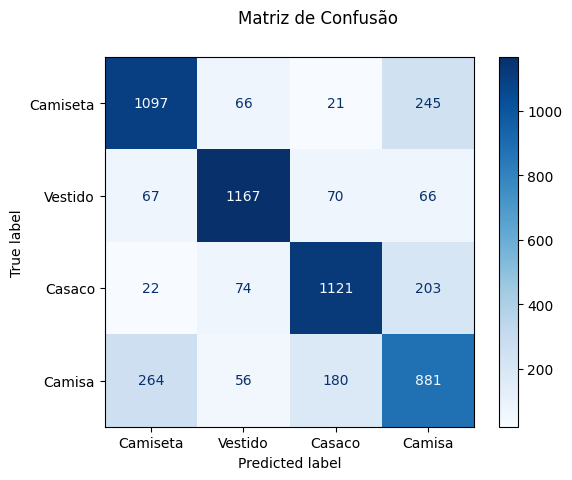

In [13]:
# Criando e mostrando a matriz de confusão com relação ao conj. de teste
print("Matriz de Confusão:\n")
print(confusion_matrix(y_test, y_pred))
dec_tree_cm_disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels_names, cmap="Blues"
).figure_.suptitle("Matriz de Confusão")

### _Bagging_


O _Bagging_ consiste em uma técnica de _ensemble learning_ em que visa melhorar a precisão e reduzir a ocorrência de _overfitting_ de determinado modelo. Para tanto, nesta técnica são construídos vários modelos independentes, utilizando subconjuntos aleatórios do conjunto original (com reposição) e, após isso, é agregado suas previsões para a tomada de decisão final. Em outras palavras e tomando como exemplo a Árvore de Decisão, seriam aplicados várias Árvores de Decisão independente para subconjuntos do conjunto de treinamento e, a partir do resultado final, haveria a combinação de todos os modelos. No caso da classificação, a classe mais frequente entre as previsões obtidas das Árvores de Decisão seria a escolhida no final do processo.

Desta forma, para aplicar o _Bagging com Árvore de Decisão_ para o _dataset_ proposto basta realizar as seguintes etapas a seguir.


In [14]:
# Métricas para análise de desempenho
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
)

# Bagging para Classificação juntamente com a Decision Tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Definindo hiperparâmetros do Bagging
max_samples = 0.6
max_features = 0.6

# Definindo hiperparâmetros da Árvore de Decisão
max_depth = 100

# Criando a estrutura básica
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=max_depth, random_state=42),
    max_samples=max_samples,
    max_features=max_features,
    random_state=42,
)

# Realizando o treinamento
bagging.fit(X=X_train, y=y_train)

# Realizando a predição no conjunto de teste
y_pred = bagging.predict(X=X_test)

# Mostrando a acurácia obtida
bagging_accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {bagging_accuracy:.2f}")

Acurácia: 0.82


Como é possível visualizar, o _Bagging com Árvore de Decisão_, utilizando **60% de amostras máximas** e **60% de características máximas**, conseguiu obter **82% de acurácia geral para classificação do conjunto de teste**. Além da acurácia, é possível visualizar o relatório completo abaixo.


In [15]:
# Mostrando o relatório completo de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=labels_names))


Relatório de Classificação:
              precision    recall  f1-score   support

    Camiseta       0.80      0.86      0.83      1429
     Vestido       0.89      0.91      0.90      1370
      Casaco       0.83      0.86      0.85      1420
      Camisa       0.75      0.65      0.69      1381

    accuracy                           0.82      5600
   macro avg       0.82      0.82      0.82      5600
weighted avg       0.82      0.82      0.82      5600



A seguir, é possível visualizar a matriz de confusão e o respectivo mapa de calor.


Matriz de Confusão:

[[1224   55   16  134]
 [  33 1247   45   45]
 [   9   61 1226  124]
 [ 257   45  188  891]]


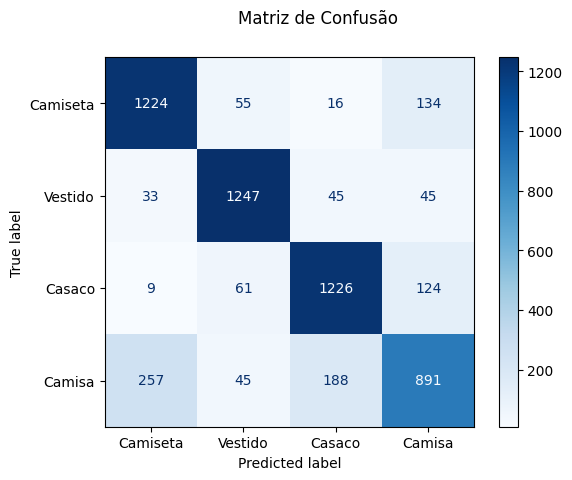

In [16]:
# Criando e mostrando a matriz de confusão com relação ao conj. de teste
print("Matriz de Confusão:\n")
print(confusion_matrix(y_test, y_pred))
bagging_cm_disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels_names, cmap="Blues"
).figure_.suptitle("Matriz de Confusão")

### _AdaBoost_


Diferentemente do _Bagging_, o _Boosting_ é uma técnica de _ensemble learning_ que combina múltiplos modelos fracos para a criação de um modelo forte. Neste caso, os modelos são treinados sequencialmente e, desta forma, cada modelo tenta corrigir os erros do modelo anterior. A ideia é de que as classes "mal classificadas" recebam um peso maior a cada iteração e modelo. O _Adaptative Boosting_, ou _AdaBoost_, é um algoritmo de _Boosting_ que é particularmente eficaz em problemas de classificação binária, se destacando nas classes de "difícil previsão" de modelos normais.

Desta forma, para aplicar o _AdaBoost com Árvore de Decisão_ para o _dataset_ proposto basta realizar as seguintes etapas a seguir.


In [17]:
# Métricas para análise de desempenho
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
)

# AdaBoost para Classificação, com Decision Tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Definindo hiperparâmetros do AdaBoost
n_estimators = 100

# Definindo hiperparâmetros da Árvore de Decisão
max_depth = 100

# Criando a estrutura básica
ada_boost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=max_depth, random_state=42),
    n_estimators=n_estimators,
    random_state=42,
)

# Realizando o treinamento
ada_boost.fit(X=X_train, y=y_train)

# Realizando a predição no conjunto de teste
y_pred = ada_boost.predict(X=X_test)

# Mostrando a acurácia obtida
ada_boost_accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {ada_boost_accuracy:.2f}")

Acurácia: 0.77


Como é possível visualizar, o _AdaBoost com Árvore de Decisão_ utilizando **100 estimadores** conseguiu obter **77% de acurácia geral para classificação do conjunto de teste**. Além da acurácia, é possível visualizar o relatório completo abaixo.


In [18]:
# Mostrando o relatório completo de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=labels_names))


Relatório de Classificação:
              precision    recall  f1-score   support

    Camiseta       0.77      0.77      0.77      1429
     Vestido       0.85      0.85      0.85      1370
      Casaco       0.80      0.79      0.80      1420
      Camisa       0.64      0.65      0.64      1381

    accuracy                           0.77      5600
   macro avg       0.77      0.77      0.77      5600
weighted avg       0.77      0.77      0.77      5600



A seguir, é possível visualizar a matriz de confusão e o respectivo mapa de calor.


Matriz de Confusão:

[[1101   69   18  241]
 [  61 1164   78   67]
 [  17   75 1128  200]
 [ 248   58  178  897]]


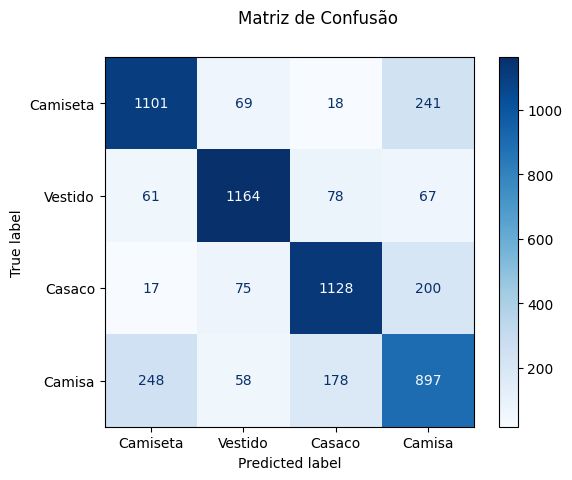

In [19]:
# Criando e mostrando a matriz de confusão com relação ao conj. de teste
print("Matriz de Confusão:\n")
print(confusion_matrix(y_test, y_pred))
ada_boost_cm_disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels_names, cmap="Blues"
).figure_.suptitle("Matriz de Confusão")

### _Random Forest_


O _Random Forest_ é um algoritmo de _ensemble learning_ que combina **múltiplas Árvores de Decisão** para melhorar a tomada de decisões. Nesta técnica, cada Árvore de Decisão é treinada em diferentes subconjuntos do conjunto de dados original. A principal diferença desta para com o uso de _Bagging com Árvore de Decisão_ está em que o _Random Forest_, durante o treinamento, seleciona aleatoriamente os subconjuntos de dados para cada divisão de nó. Em outras palavras, enquanto que no _Bagging_ para cada divisão em um nó da árvore **todos** os atributos são considerados, no _Random Forest_ para cada divisão de nó é levado em consideração diferentes conjuntos de atributos. Por conta disso, o _Random Forest_ reduz ainda mais a correlação entre as Árvores de Decisão, geralmente levando a modelos mais robustos e precisos.

Desta forma, para aplicar o _Random Forest_ para o _dataset_ proposto basta realizar as seguintes etapas a seguir.


In [20]:
# Métricas para análise de desempenho
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
)

# Random Forest para Classificação
from sklearn.ensemble import RandomForestClassifier

# Definindo hiperparâmetros do Random Forest
n_estimators = 100
max_depth = 100

# Criando a estrutura básica
rand_forest = RandomForestClassifier(
    n_estimators=n_estimators, max_depth=max_depth, random_state=42
)

# Realizando o treinamento
rand_forest.fit(X=X_train, y=y_train)

# Realizando a predição no conjunto de teste
y_pred = rand_forest.predict(X=X_test)

# Mostrando a acurácia obtida
rand_forest_accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {rand_forest_accuracy:.2f}")

Acurácia: 0.85


Como é possível visualizar, o _Random Forest_ com **100 estimadores e 100 de profundidade máxima** conseguiu obter **85% de acurácia geral para classificação do conjunto de teste**. Além da acurácia, é possível visualizar o relatório completo abaixo.


In [21]:
# Mostrando o relatório completo de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=labels_names))


Relatório de Classificação:
              precision    recall  f1-score   support

    Camiseta       0.82      0.87      0.85      1429
     Vestido       0.91      0.92      0.92      1370
      Casaco       0.87      0.90      0.88      1420
      Camisa       0.78      0.70      0.73      1381

    accuracy                           0.85      5600
   macro avg       0.85      0.85      0.85      5600
weighted avg       0.85      0.85      0.85      5600



A seguir, é possível visualizar a matriz de confusão e o respectivo mapa de calor.


Matriz de Confusão:

[[1248   40    5  136]
 [  23 1267   41   39]
 [   1   47 1272  100]
 [ 242   35  142  962]]


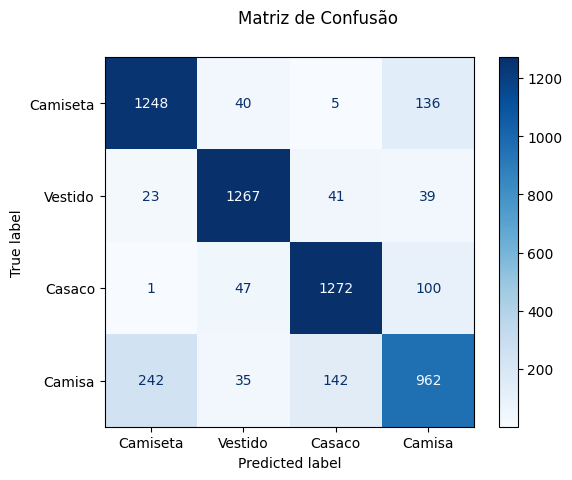

In [22]:
# Criando e mostrando a matriz de confusão com relação ao conj. de teste
print("Matriz de Confusão:\n")
print(confusion_matrix(y_test, y_pred))
rand_forest_cm_disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels_names, cmap="Blues"
).figure_.suptitle("Matriz de Confusão")

### Ajuste de Hiperparâmetros do Melhor Modelo: **_Random Forest_**


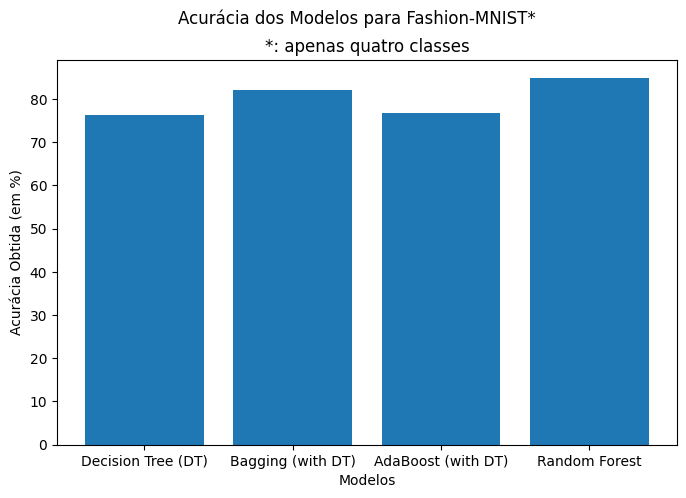

In [23]:
# Criando o gráfico de comparativo de acurácia entre modelos
acc_names_fig = np.array(
    ["Decision Tree (DT)", "Bagging (with DT)", "AdaBoost (with DT)", "Random Forest"]
)
acc_values_fig = np.array(
    [
        dec_tree_accuracy * 100,
        bagging_accuracy * 100,
        ada_boost_accuracy * 100,
        rand_forest_accuracy * 100,
    ]
)

plt.figure(figsize=(8, 5))
plt.bar(acc_names_fig, acc_values_fig)
plt.suptitle("Acurácia dos Modelos para Fashion-MNIST*")
plt.title("*: apenas quatro classes")
plt.xlabel("Modelos")
plt.ylabel("Acurácia Obtida (em %)")
plt.show()

Tendo em vista os resultados de **acurácia** obtidos por cada modelo executado anteriormente, e os quais são possíveis de visualizar no gráfico anterior, obteve-se que o melhor modelo foi o **Random Forest** com **85% de acurácia**. Desta forma, torna-se necessário verificar se é possível melhorar os hiperparâmetros para a obtenção de melhores resultados.

Para tanto, é possível aplicar a técnica de **_Grid Search_**, a qual consiste em realizar testes exaustivos com base em um conjunto de valores especificados para os hiperparâmetros. Em outras palavras, esta técnica testa todas as combinações de hiperparâmetros especificadas pelo usuário para um determinado modelo, obtendo a melhor combinação ao final dos testes.


In [24]:
# Importação do Grid Search para melhorar o modelo
from sklearn.model_selection import GridSearchCV

# Criação de um dicionário para conter um conjunto de valores de teste
# Quatro números de estimadores máximo e quatro números de profundidade máxima
param_grid = [
    {
        "n_estimators": [10, 50, 100, 1000],
        "max_depth": [10, 50, 100, 150],
    }
]

# Aplicação do Grid Search: execução exaustiva!
grid_search_rand_forest = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42), param_grid=param_grid
)

# Treinamento do Grid Search
grid_search_rand_forest.fit(X=X_train, y=y_train)

# Mostrando os melhores parâmetros obtidos
print(f"Melhores hiperparâmetros: {grid_search_rand_forest.best_params_}")

# Realizando a predição no conjunto de teste
y_pred = grid_search_rand_forest.predict(X=X_test)

# Mostrando a acurácia obtida
grid_search_rand_forest_accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {grid_search_rand_forest_accuracy:.2f}")

# Mostrando o relatório completo de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=labels_names))

Melhores hiperparâmetros: {'max_depth': 50, 'n_estimators': 1000}
Acurácia: 0.85

Relatório de Classificação:
              precision    recall  f1-score   support

    Camiseta       0.83      0.88      0.85      1429
     Vestido       0.91      0.93      0.92      1370
      Casaco       0.87      0.90      0.89      1420
      Camisa       0.79      0.70      0.74      1381

    accuracy                           0.85      5600
   macro avg       0.85      0.85      0.85      5600
weighted avg       0.85      0.85      0.85      5600



Como é possível visualizar, o _Random Forest_ com **1000 estimadores e 50 de profundidade máxima** conseguiu obter, também, **85% de acurácia geral para classificação do conjunto de teste**. Também, é possível visualizar a matriz de confusão a seguir, a qual mostra com mais detalhes em como essa performance foi melhor do que a anterior em, por exemplo, na **predição correta da classe "Camisa"**.


Matriz de Confusão:

[[1251   39    6  133]
 [  22 1273   38   37]
 [   1   49 1278   92]
 [ 235   35  145  966]]


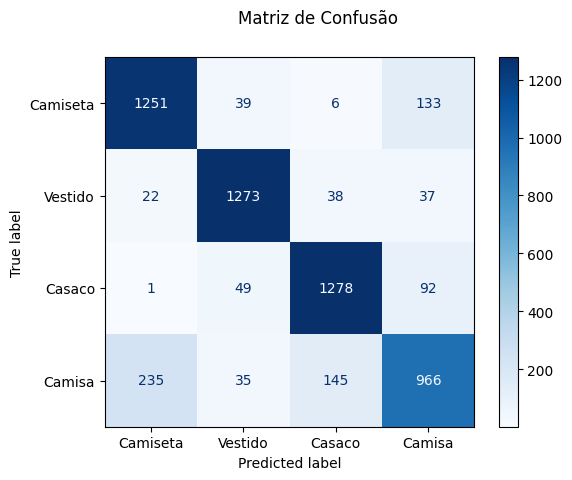

In [25]:
# Criando e mostrando a matriz de confusão com relação ao conj. de teste
print("Matriz de Confusão:\n")
print(confusion_matrix(y_test, y_pred))
grid_search_rand_forest_cm_disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels_names, cmap="Blues"
).figure_.suptitle("Matriz de Confusão")

---


## **Multiclasse para Binário**


Nesta seção, o problema multiclasse será tratado para binário por meio de duas abordagens diferentes: o **One vs All** e o **One vs One**. Cada qual será explicada em sua seção específica. Além disso, os subconjuntos de treinamento e de teste da abordagem **_cross-validation_** serão os mesmos utilizados anteriormente.


### _One vs All (OVA) / One vs Rest (OVR)_


A abordagem **One vs All (OVA)**, ou **One vs Rest (OVR)**, consiste em ajustar **um classificador por classe**. Neste caso, para cada classificador, a classe é ajustada com relação a todas as outras classes, tornando um modelo mais interpretável, uma vez que cada classe é representada por um classificador.


In [12]:
# Métricas para análise de desempenho
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
)

# One vs Rest com Decision Tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier

# Definindo hiperparâmetros do Decision Tree
max_depth = 100

# Criando a estrutura básica
ovr = OneVsRestClassifier(
    estimator=DecisionTreeClassifier(max_depth=max_depth, random_state=42)
)

# Realizando o treinamento
ovr.fit(X=X_train, y=y_train)

# Realizando a predição no conjunto de teste
y_pred = ovr.predict(X=X_test)

# Mostrando a acurácia obtida
ovr_accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {ovr_accuracy:.2f}")

Acurácia: 0.73


Como é possível visualizar, a _Árvore de Decisão_ com a abordagem **OVA/OVR** e utilizando **100 de profundidade máxima** conseguiu obter **73% de acurácia geral para classificação do conjunto de teste**. Além da acurácia, é possível visualizar o relatório completo abaixo.


In [13]:
# Mostrando o relatório completo de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=labels_names))


Relatório de Classificação:
              precision    recall  f1-score   support

    Camiseta       0.86      0.64      0.74      1429
     Vestido       0.91      0.78      0.84      1370
      Casaco       0.83      0.67      0.74      1420
      Camisa       0.52      0.83      0.63      1381

    accuracy                           0.73      5600
   macro avg       0.78      0.73      0.74      5600
weighted avg       0.78      0.73      0.74      5600



A seguir, é possível visualizar a matriz de confusão e o respectivo mapa de calor. Perceba o quão melhor para a **predição da classe "Camisa"** esta abordagem foi do que com relação aos modelos testados anteriormente.


Matriz de Confusão:

[[ 915   41   20  453]
 [  25 1071   84  190]
 [   4   32  957  427]
 [ 116   36   89 1140]]


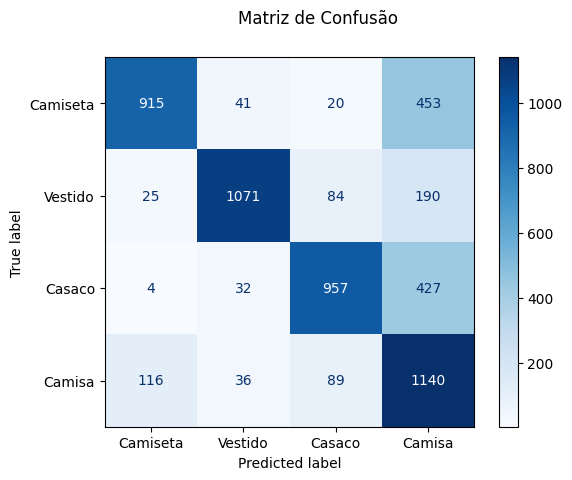

In [14]:
# Criando e mostrando a matriz de confusão com relação ao conj. de teste
print("Matriz de Confusão:\n")
print(confusion_matrix(y_test, y_pred))
ovr_cm_disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels_names, cmap="Blues"
).figure_.suptitle("Matriz de Confusão")

### _One vs One (OVO)_


A abordagem **One vs One (OVO)** consiste em ajustar **um classificador por par de classes**. Neste método, são criados classificadores binários para cada par de classes e, com isso, cada classificador é treinado para distinguir entre duas classes específicas. Se um novo dado precisa ser classificado, ele é submetido a todos os classificadores e a classe que receber mais votos é considerada como a predita. Naturalmente, esta técnica é mais lenta do que a **OVA/OVR**, mas pode ser vantajosa em determinadas situações.


In [15]:
# Métricas para análise de desempenho
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
)

# One vs One com Decision Tree
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier

# Definindo hiperparâmetros do Decision Tree
max_depth = 100

# Criando a estrutura básica
ovo = OneVsOneClassifier(
    estimator=DecisionTreeClassifier(max_depth=max_depth, random_state=42)
)

# Realizando o treinamento
ovo.fit(X=X_train, y=y_train)

# Realizando a predição no conjunto de teste
y_pred = ovo.predict(X=X_test)

# Mostrando a acurácia obtida
ovo_accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {ovo_accuracy:.2f}")

Acurácia: 0.76


Como é possível visualizar, a _Árvore de Decisão_ com a abordagem **OVO** e utilizando **100 de profundidade máxima** conseguiu obter **76% de acurácia geral para classificação do conjunto de teste**. Além da acurácia, é possível visualizar o relatório completo abaixo.


In [16]:
# Mostrando o relatório completo de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=labels_names))


Relatório de Classificação:
              precision    recall  f1-score   support

    Camiseta       0.80      0.75      0.77      1429
     Vestido       0.90      0.81      0.85      1370
      Casaco       0.79      0.79      0.79      1420
      Camisa       0.58      0.67      0.62      1381

    accuracy                           0.76      5600
   macro avg       0.77      0.76      0.76      5600
weighted avg       0.77      0.76      0.76      5600



A seguir, é possível visualizar a matriz de confusão e o respectivo mapa de calor.


Matriz de Confusão:

[[1077   46   12  294]
 [  47 1109   86  128]
 [   1   46 1126  247]
 [ 227   35  194  925]]


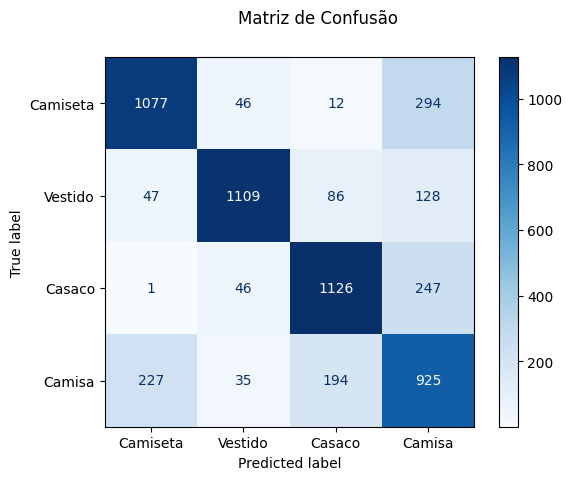

In [17]:
# Criando e mostrando a matriz de confusão com relação ao conj. de teste
print("Matriz de Confusão:\n")
print(confusion_matrix(y_test, y_pred))
ovo_cm_disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels_names, cmap="Blues"
).figure_.suptitle("Matriz de Confusão")

### Melhor Abordagem: **_One vs One_**


De acordo com os resultados obtidos, a melhor abordagem binária para este problema foi a **One vs One**, dado com **76% de acurácia geral**, ainda que a **One vs All** tenha predito melhor a classe _Camisa_. O gráfico abaixo exprime as acurácias obtidas durante os testes.


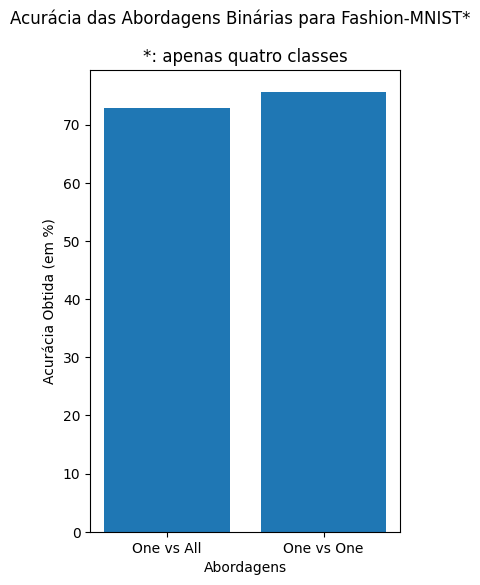

In [20]:
# Criando o gráfico de comparativo de acurácia entre abordagens binárias
acc_names_fig = np.array(["One vs All", "One vs One"])
acc_values_fig = np.array(
    [
        ovr_accuracy * 100,
        ovo_accuracy * 100,
    ]
)

plt.figure(figsize=(4, 6))
plt.bar(acc_names_fig, acc_values_fig)
plt.suptitle("Acurácia das Abordagens Binárias para Fashion-MNIST*")
plt.title("*: apenas quatro classes")
plt.xlabel("Abordagens")
plt.ylabel("Acurácia Obtida (em %)")
plt.show()

---
